In [92]:
import numpy as np
import math
np.random.seed(123)

def sign(x):
    x = np.sign(x)
    if len(x.shape) == 0: # スカラーの時変な挙動になるので
        if x == 0:
            x = -1
        return x
    for i in range(x.shape[0]):
        if x[i] == 0:
            x[i] = -1
    return x

# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1
x, y = x_d4, y_d4

lmd = 0.1 # 正則化項
delta = 0.01 # 勾配降下法の学習率
# x: n x 4 / y: n (vec) / w: 4

def J(w):
    global x, y
    return sum([math.log(1 + math.e**(-y[i] * np.dot(w.T, x[i]))) for i in range(n)]) + lmd * np.dot(w.T, w)

def dJdw(w):
    global x, y
    return sum([(-y[i] * x[i]) * math.e**(-y[i] * np.dot(w.T, x[i]))/(1 + math.e**(-y[i] * np.dot(w.T, x[i]))) for i in range(n)]) + 2 * lmd * w

def J_hessian(w):
    global x, y
    return sum([y[i]**2 * np.dot(np.expand_dims(x[i], 0).T, np.expand_dims(x[i], 0)) * math.e**(-y[i] * np.dot(w.T, x[i])) / (1 + math.e**(-y[i] * np.dot(w.T, x[i])))\
                - y[i]**2 * np.dot(np.expand_dims(x[i], 0).T, np.expand_dims(x[i], 0)) * (math.e**(-y[i] * np.dot(w.T, x[i])))**2/(1 + math.e**(-y[i] * np.dot(w.T, x[i])))**2\
               for i in range(n)]) + 2 * lmd * np.eye(x[0].shape[0])
    

def check(w):
    global x, y
    wrong = 0
    for i in range(n):
        y2 = sign(np.dot(w.T, x[i]))
        if y[i] != y2:
            wrong += 1
    return wrong

# 最急降下法

In [124]:
w = np.zeros(4)

In [125]:
check(w)

112

In [126]:
res1 = []
res1.append(w.copy())
for i in range(200):
    w -= delta * dJdw(w)
    res1.append(w.copy())

In [127]:
check(w)

19

# ニュートン法

In [128]:
w2 = np.zeros(4)

In [129]:
check(w2)

112

In [130]:
res2 = []
res2.append(w2.copy())
for i in range(200):
    w2 -= np.dot(np.linalg.inv(J_hessian(w2)), dJdw(w2))
    res2.append(w2.copy())

In [131]:
check(w2)

19

# 結果を可視化

In [132]:
w

array([ 4.60189288, -2.09403347, -0.24238406, -0.31604861])

In [133]:
w2

array([ 4.6402715 , -2.10998965, -0.24262275, -0.32044576])

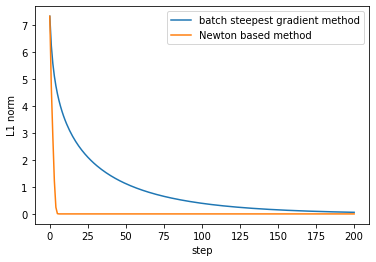

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
def l1(x):
    return sum([abs(i) for i in x])

plt.plot([i for i in range(len(res1))], [l1(i - res2[len(res2)-1]) for i in res1], label="batch steepest gradient method")
plt.plot([i for i in range(len(res1))], [l1(i - res2[len(res2)-1]) for i in res2], label="Newton based method")

plt.xlabel("step")
plt.ylabel("L1 norm")
plt.legend()
plt.show()

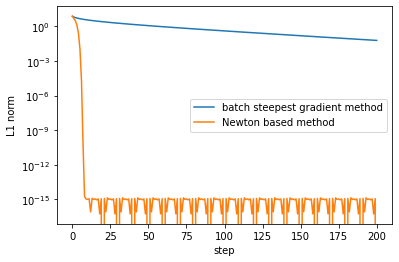

In [137]:
plt.plot([i for i in range(len(res1))], [l1(i - res2[len(res2)-1]) for i in res1], label="batch steepest gradient method")
plt.plot([i for i in range(len(res1))], [l1(i - res2[len(res2)-1]) for i in res2], label="Newton based method")

plt.yscale("log")
plt.xlabel("step")
plt.ylabel("L1 norm")
plt.legend()
plt.show()